### Loading the dataset

In [23]:
import json

# Read the JSON file into a dictionary
with open('PowerToys.json', 'r') as json_file:
    data_dict = json.load(json_file)

print(len(data_dict))

6301


### Preparing the dataset

Here we want to remove the pull requests that have no comments, since these pull requests are useless for our purpose and remove the pull requests where the last comment is a bot. The whole purpose of our machine learning is to try to predict the last commentor on a pull request, having that on our dataset would be intentionally keeping an outliar, which is a bad decision

In [24]:
# Create a list to store keys to delete
keys_to_delete = []

# Iterate over the dictionary to mark keys for deletion
for key, value in data_dict.items():
    if value.get('num_comments', 0) < 1 or value.get('userlogin') == 'msftbot[bot]':
        keys_to_delete.append(key)

# Delete the marked keys from the dictionary
for key in keys_to_delete:
    del data_dict[key]

print(len(data_dict))

5190


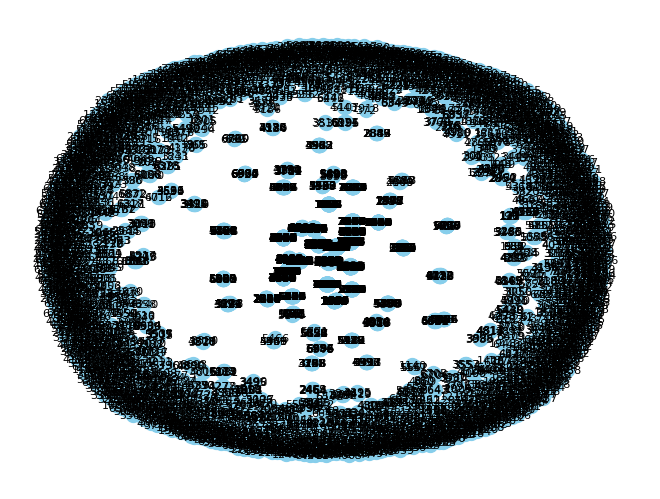

<Figure size 1000x1000 with 0 Axes>

In [25]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new graph
G = nx.Graph()

# Iterate over the remaining data in data_dict and add nodes with attributes
for key, attributes in data_dict.items():
    G.add_node(key, **attributes)

# Infer edges based on a common attribute (e.g., 'userid' attribute)
for node1 in G.nodes:
    for node2 in G.nodes:
        if node1 != node2 and G.nodes[node1]['userid'] == G.nodes[node2]['userid']:
            G.add_edge(node1, node2)

# Draw the graph
pos = nx.spring_layout(G)  # Choose a layout for graph visualization
nx.draw(G, pos, with_labels=True, node_size=100, node_color='skyblue', font_size=8)

# If you still see no nodes, try increasing the figure size for a larger display
plt.figure(figsize=(10, 10))
plt.show()


In [45]:
# Feature 1: Number of comments per issue

# Print the number of comments for the first 100 issues
for issue, data in list(data_dict.items())[:100]:
    if 'num_comments' in data:
        print(f"Issue {issue}: Number of Comments = {data['num_comments']}")

Issue 2: Number of Comments = 1
Issue 3: Number of Comments = 1
Issue 5: Number of Comments = 12
Issue 6: Number of Comments = 44
Issue 9: Number of Comments = 1
Issue 15: Number of Comments = 1
Issue 18: Number of Comments = 2
Issue 20: Number of Comments = 5
Issue 21: Number of Comments = 6
Issue 25: Number of Comments = 1
Issue 27: Number of Comments = 5
Issue 28: Number of Comments = 4
Issue 29: Number of Comments = 1
Issue 30: Number of Comments = 2
Issue 31: Number of Comments = 5
Issue 34: Number of Comments = 2
Issue 36: Number of Comments = 6
Issue 37: Number of Comments = 8
Issue 38: Number of Comments = 2
Issue 40: Number of Comments = 1
Issue 41: Number of Comments = 1
Issue 42: Number of Comments = 5
Issue 44: Number of Comments = 69
Issue 45: Number of Comments = 1
Issue 46: Number of Comments = 2
Issue 48: Number of Comments = 1
Issue 49: Number of Comments = 5
Issue 51: Number of Comments = 7
Issue 52: Number of Comments = 8
Issue 53: Number of Comments = 11
Issue 54: N

In [46]:
#feature 2: time elapsed between open and close

from datetime import datetime
# Create a new feature: time elapsed between open and close
for issue, data in data_dict.items():
    if 'created_at' in data and 'closed_at' in data:
        created_at = datetime.strptime(data['created_at'], '%m/%d/%y, %I:%M:%S %p')
        closed_at = datetime.strptime(data['closed_at'], '%m/%d/%y, %I:%M:%S %p')
        time_elapsed = (closed_at - created_at).total_seconds()
        data['time_elapsed'] = time_elapsed

# Print the time elapsed for the first 3 issues
for issue, data in list(data_dict.items())[:100]:
    if 'time_elapsed' in data:
        print(f"Issue {issue}: Time Elapsed = {data['time_elapsed']} seconds")

Issue 2: Time Elapsed = 231557.0 seconds
Issue 3: Time Elapsed = 229391.0 seconds
Issue 5: Time Elapsed = 37529509.0 seconds
Issue 6: Time Elapsed = 32731508.0 seconds
Issue 9: Time Elapsed = 217219.0 seconds
Issue 15: Time Elapsed = 39.0 seconds
Issue 18: Time Elapsed = 56802789.0 seconds
Issue 20: Time Elapsed = 25006893.0 seconds
Issue 21: Time Elapsed = 32100266.0 seconds
Issue 25: Time Elapsed = 87094.0 seconds
Issue 27: Time Elapsed = 21164612.0 seconds
Issue 28: Time Elapsed = 25179917.0 seconds
Issue 29: Time Elapsed = 250.0 seconds
Issue 30: Time Elapsed = 15360.0 seconds
Issue 31: Time Elapsed = 18578075.0 seconds
Issue 34: Time Elapsed = 49609.0 seconds
Issue 36: Time Elapsed = 10676961.0 seconds
Issue 37: Time Elapsed = 34246031.0 seconds
Issue 38: Time Elapsed = 56746330.0 seconds
Issue 40: Time Elapsed = 49254.0 seconds
Issue 41: Time Elapsed = 35711.0 seconds
Issue 42: Time Elapsed = 32059095.0 seconds
Issue 44: Time Elapsed = 33774082.0 seconds
Issue 45: Time Elapsed = 

In [52]:
#feature 3: average time elapsed for issue per user
from datetime import datetime
from collections import defaultdict

# Create a dictionary to store the total elapsed time for each user
total_elapsed_time = defaultdict(int)
comment_count = defaultdict(int)

# Collect elapsed times for each user
for issue, data in data_dict.items():
    if 'comments' in data:
        comments = data['comments']
        if comments:
            last_comment = comments[str(len(comments) - 1)]
            userid = last_comment['userid']
            created_at = datetime.strptime(data['created_at'], '%m/%d/%y, %I:%M:%S %p')
            closed_at = datetime.strptime(data['closed_at'], '%m/%d/%y, %I:%M:%S %p')
            time_elapsed = (closed_at - created_at).total_seconds()
            total_elapsed_time[userid] += time_elapsed
            comment_count[userid] += 1

# Calculate the average elapsed time for each user
average_elapsed_time = {userid: total_time / comment_count[userid] for userid, total_time in total_elapsed_time.items() if comment_count[userid] != 0}

# Print the average elapsed time for each user
for userid, avg_time in average_elapsed_time.items():
    print(f"User {userid}: Average Elapsed Time - {avg_time} seconds")


User 26118718: Average Elapsed Time - 3406276.0833333335 seconds
User 3206696: Average Elapsed Time - 5272307.7128270585 seconds
User 466713: Average Elapsed Time - 32731508.0 seconds
User 12934716: Average Elapsed Time - 39.0 seconds
User 1462282: Average Elapsed Time - 4931216.9817113 seconds
User 1976577: Average Elapsed Time - 250.0 seconds
User 2439757: Average Elapsed Time - 15360.0 seconds
User 21184718: Average Elapsed Time - 49609.0 seconds
User 17704638: Average Elapsed Time - 434183.3076923077 seconds
User 14339291: Average Elapsed Time - 28584569.5 seconds
User 12767988: Average Elapsed Time - 35711.0 seconds
User 9118575: Average Elapsed Time - 1065442.0 seconds
User 13162784: Average Elapsed Time - 28347958.5 seconds
User 13648321: Average Elapsed Time - 70719.0 seconds
User 8075604: Average Elapsed Time - 25260780.0 seconds
User 17028679: Average Elapsed Time - 147604.0 seconds
User 1389841: Average Elapsed Time - 117623.0 seconds
User 11729541: Average Elapsed Time - 41